In [43]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

In [118]:
PATH_TO_TRAIN = "data/train.csv"

train_df = pd.read_csv(PATH_TO_TRAIN)

train_df.drop(["Id"], axis = 1, inplace = True)
train_df["MSSubClass"] = train_df["MSSubClass"].astype("object")
train_df["OverallCond"] = train_df["OverallCond"].astype("object")


train_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [119]:
print("*" * 100)
print("Shape")
print("*" * 100)
print(train_df.shape)

print("*" * 100)
print("Data Types")
print("*" * 100)
print(train_df.dtypes)

print("*" * 100)
print("Num NA")
print("*" * 100)
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])


****************************************************************************************************
Shape
****************************************************************************************************
(1460, 80)
****************************************************************************************************
Data Types
****************************************************************************************************
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object
****************************************************************************************************
Num NA
****************************************************************************************************
LotFrontage      259
Alley           1369
MasVnrType      

In [120]:
cat_thresh = 10

string_features = [feature for feature in train_df.columns if train_df[feature].dtypes == "O"]

discrete_features = [feature for feature in train_df.columns if train_df[feature].nunique() < cat_thresh and train_df[feature].dtypes != "O"]

categorical_features = string_features + discrete_features

numerical_features = [feature for feature in train_df.columns if feature not in discrete_features and train_df[feature].dtypes != "O"]

print("Num Categorical: ", len(categorical_features))
print("Num Numerical: ", len(numerical_features))

Num Categorical:  55
Num Numerical:  25


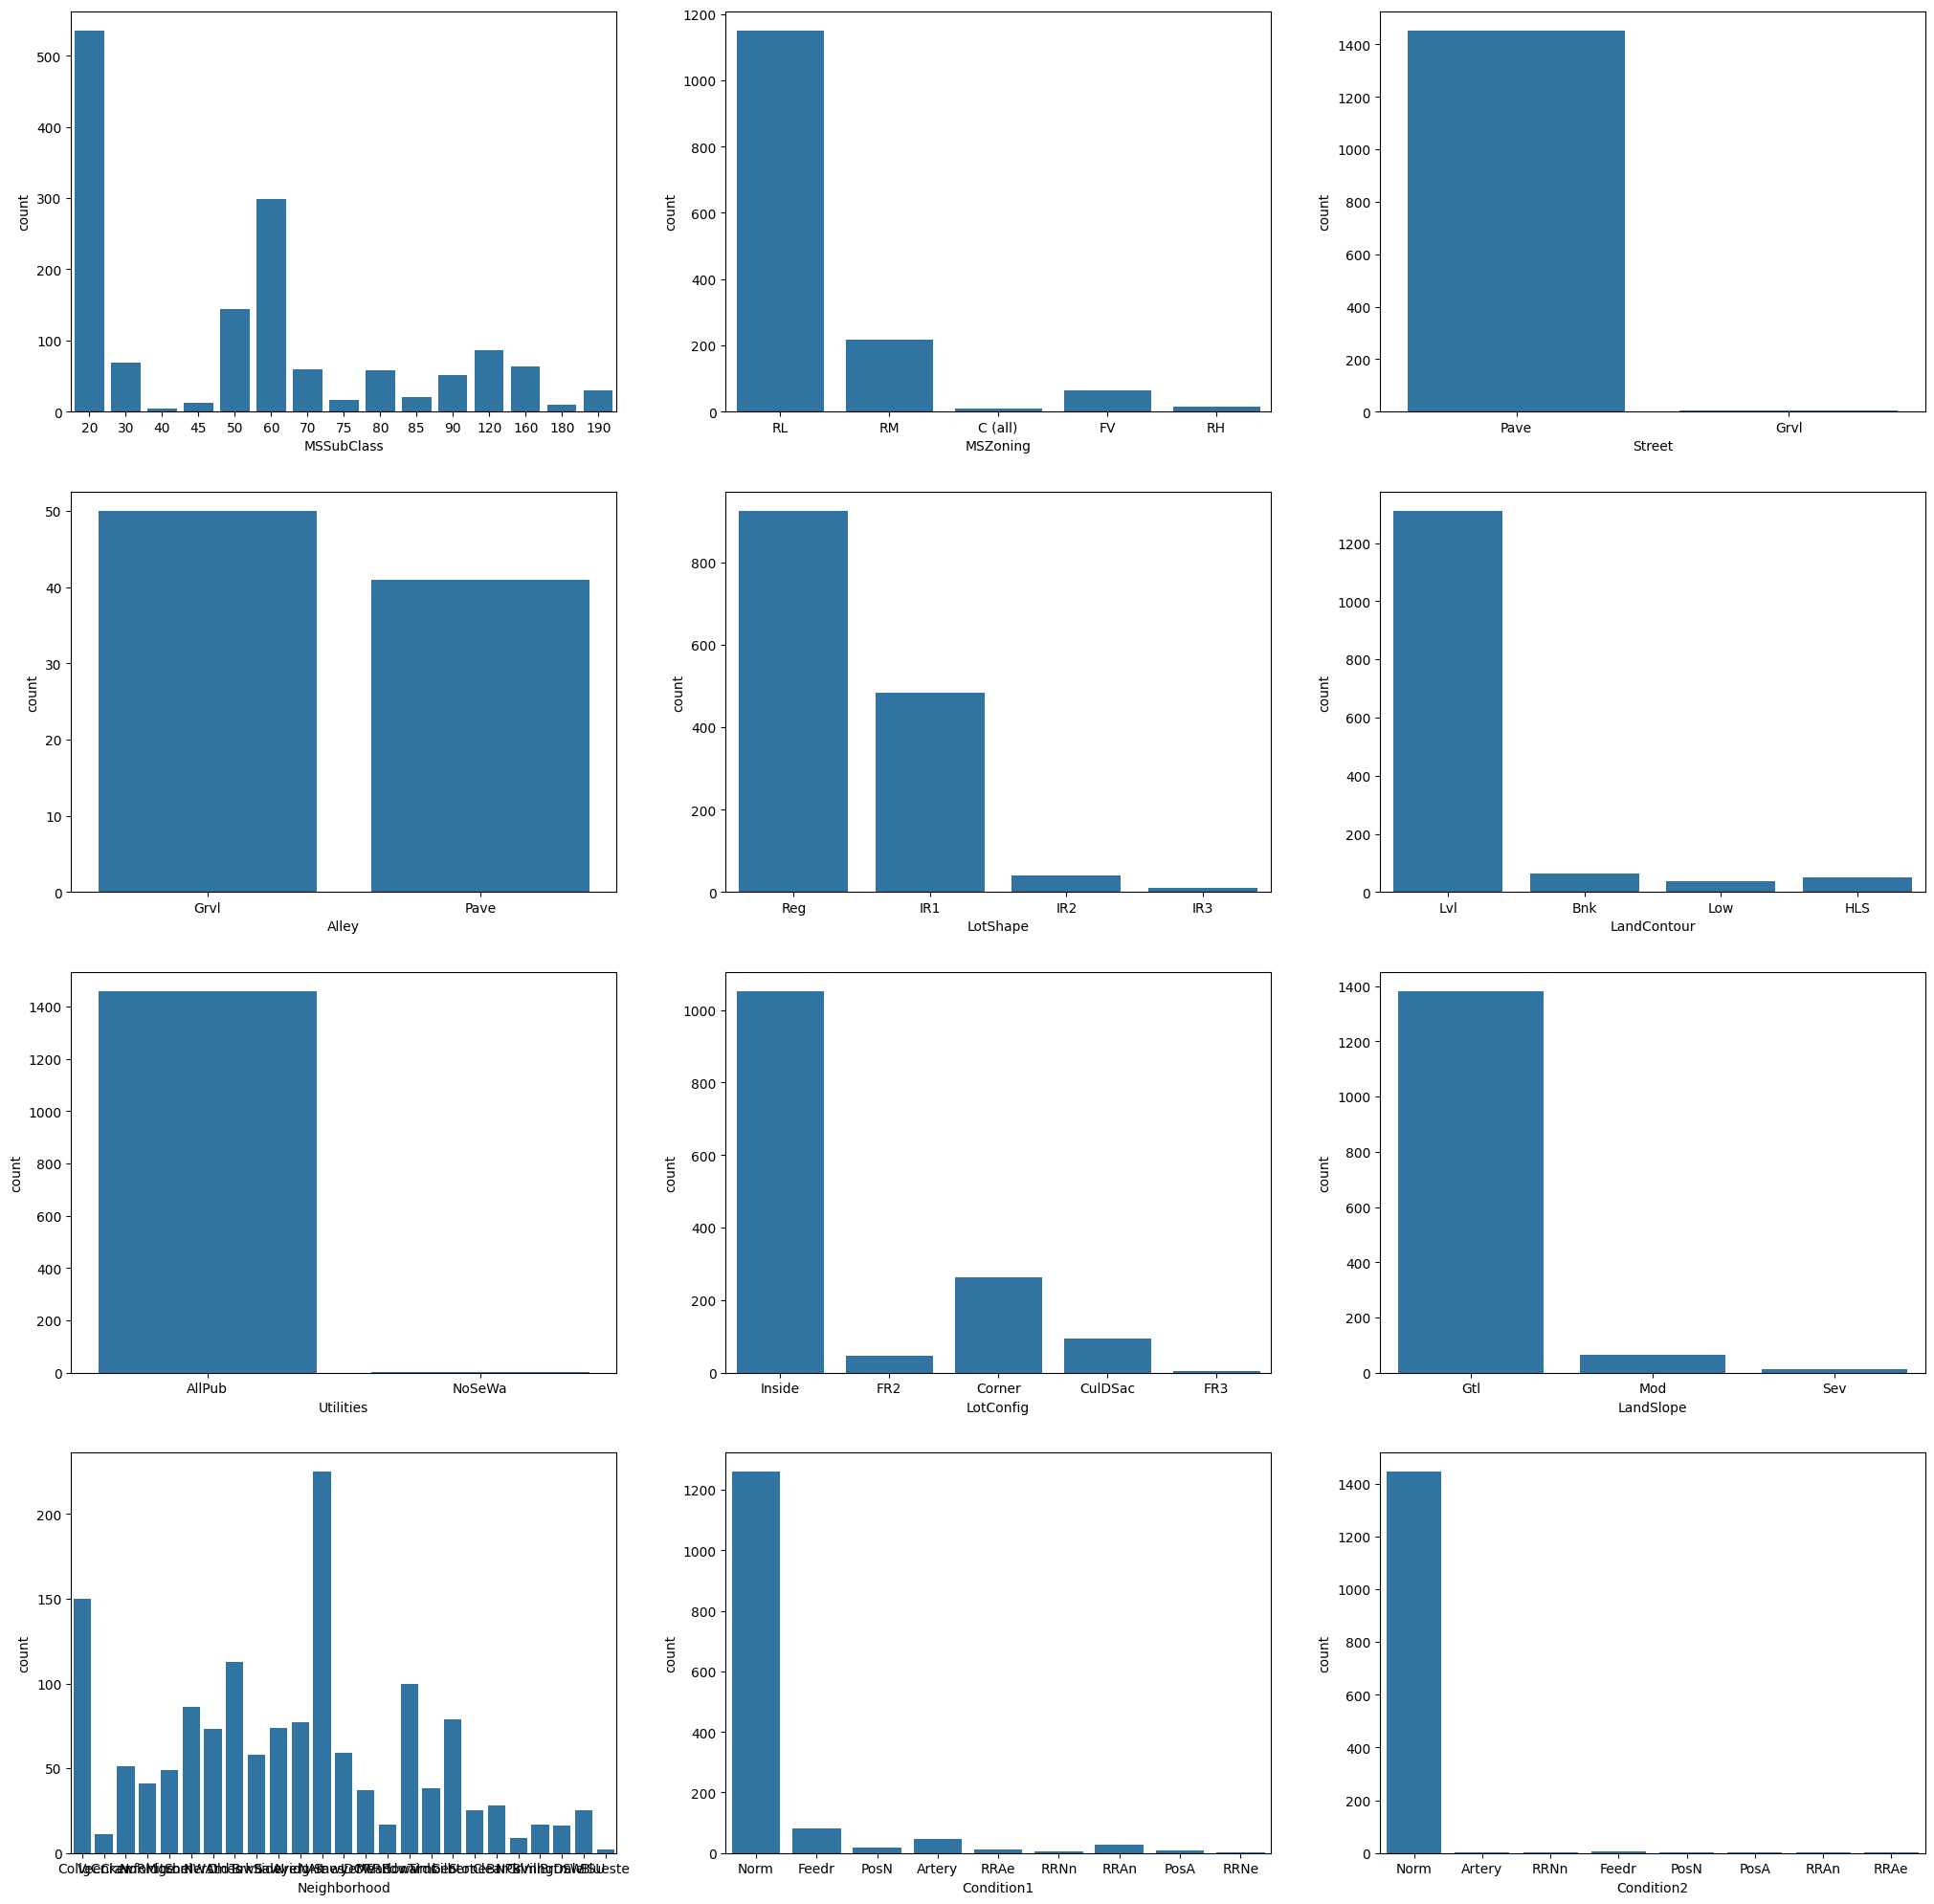

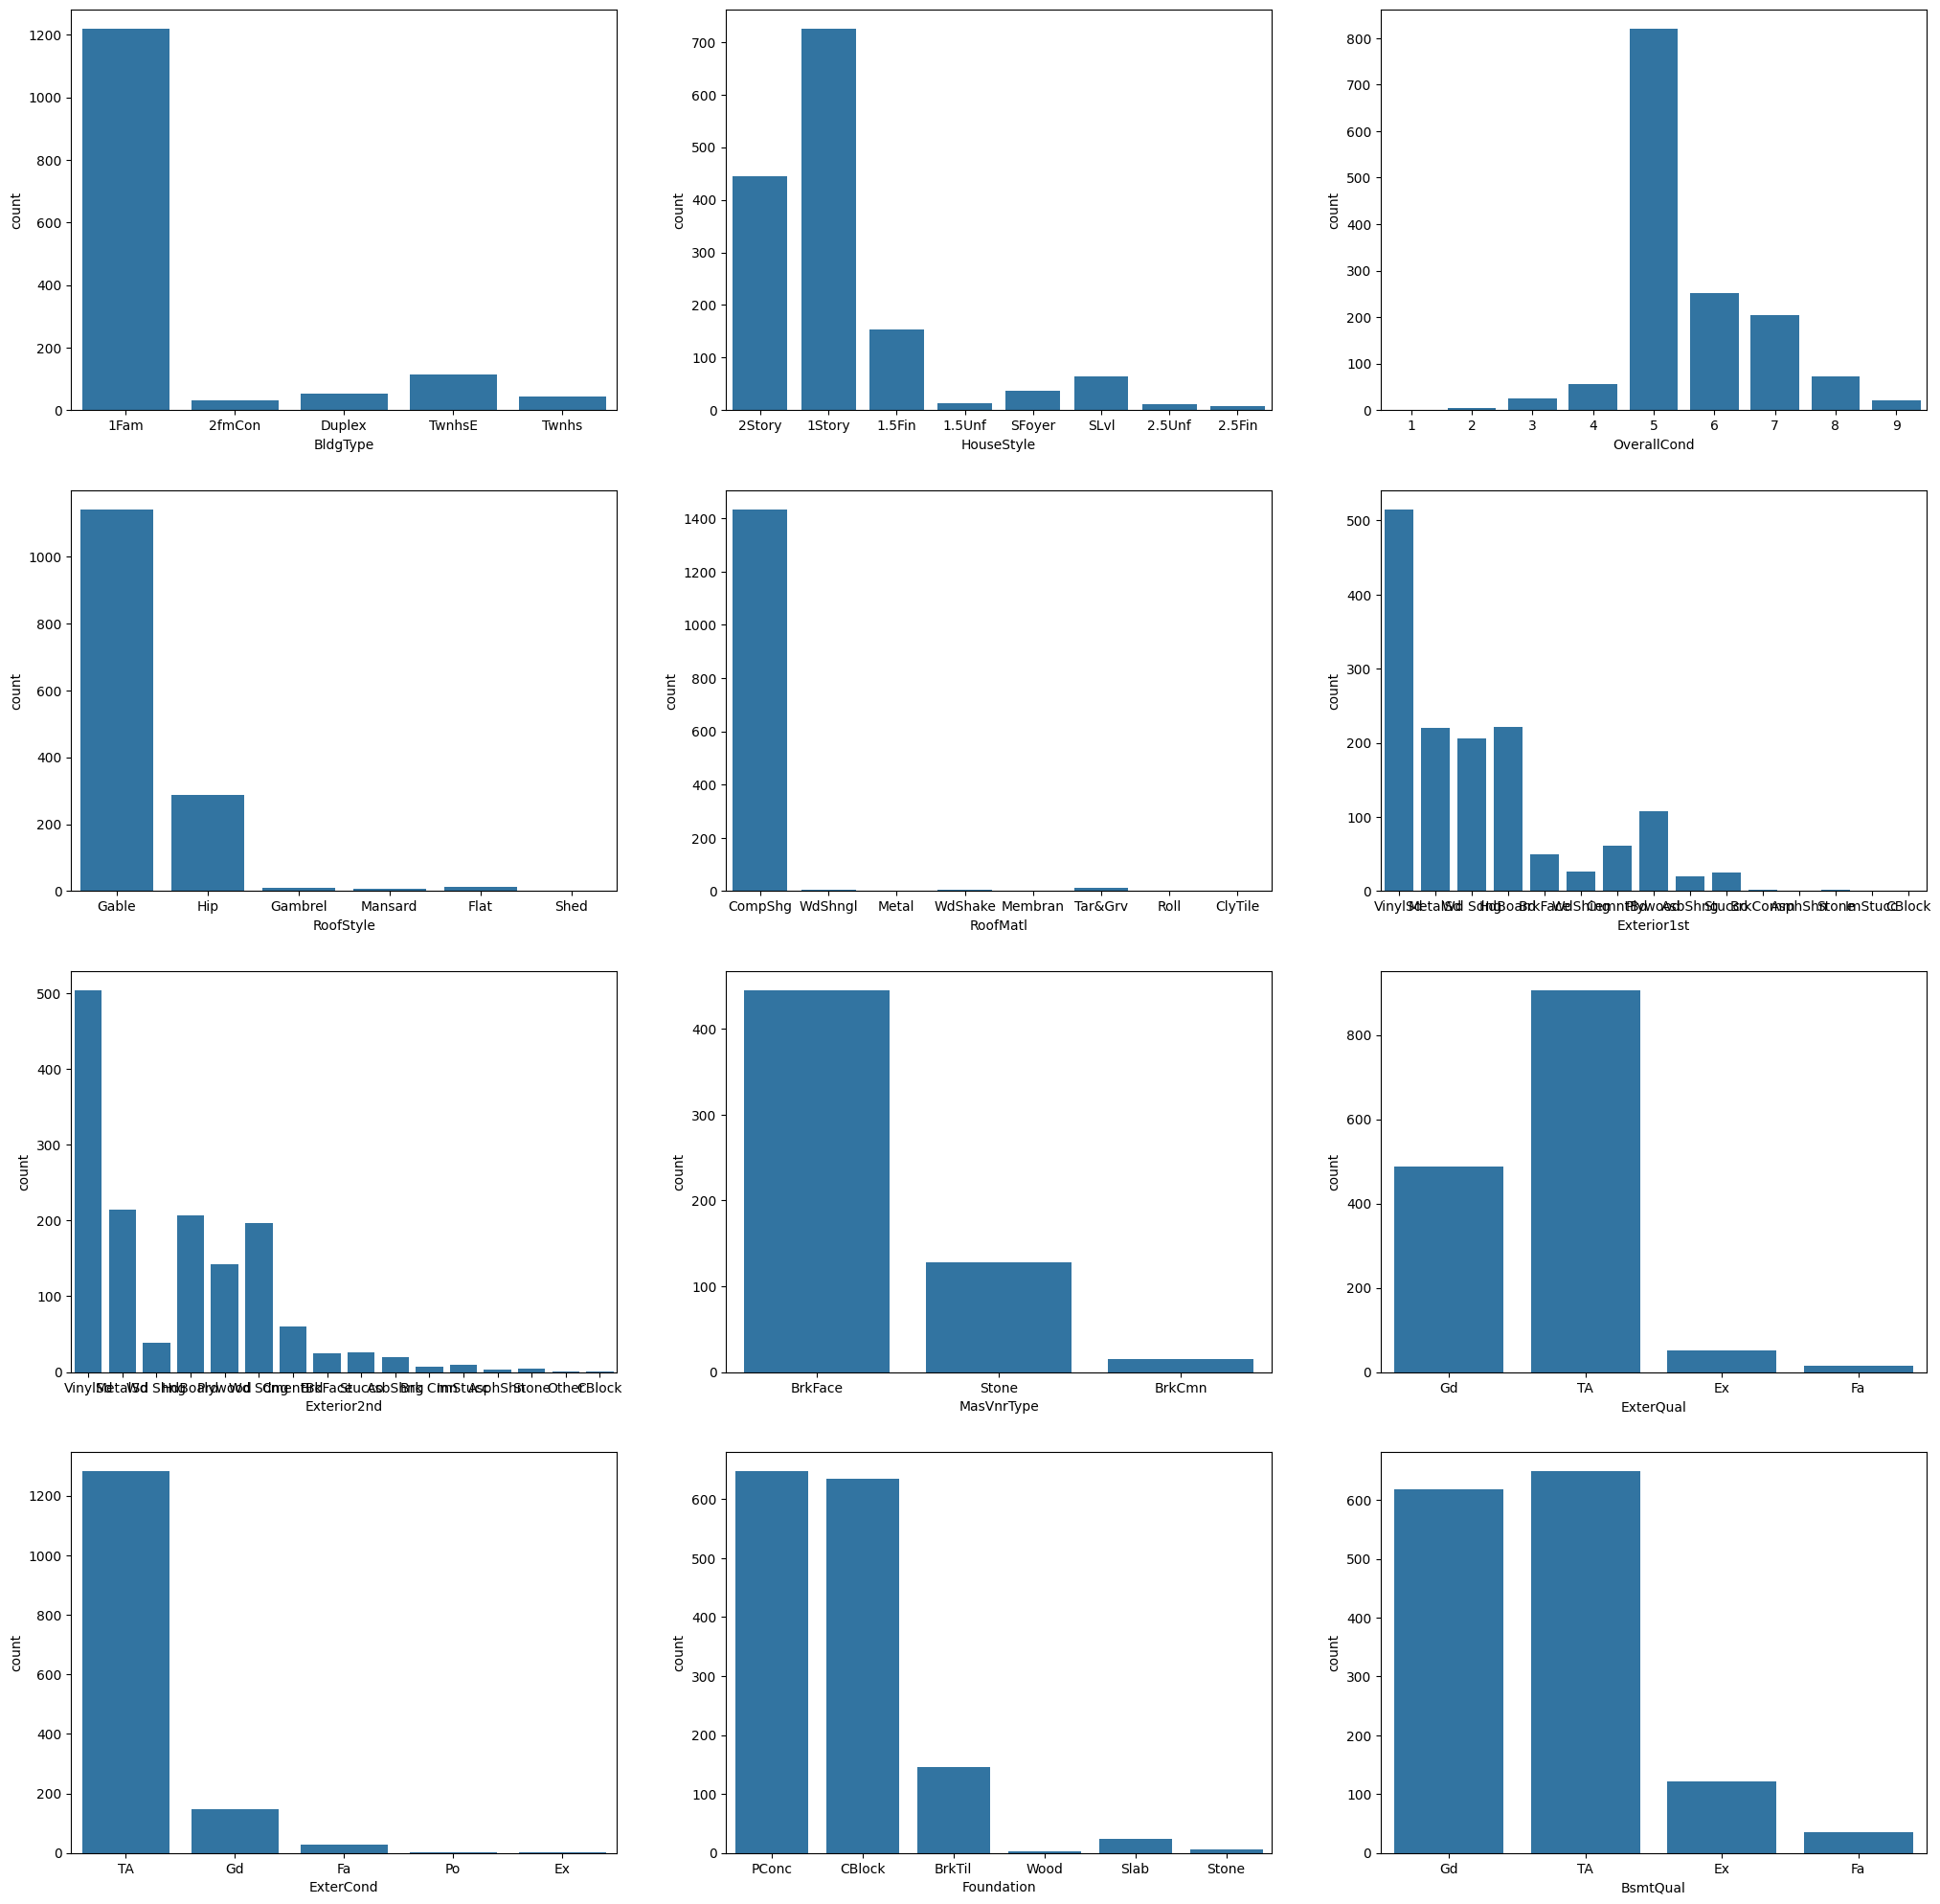

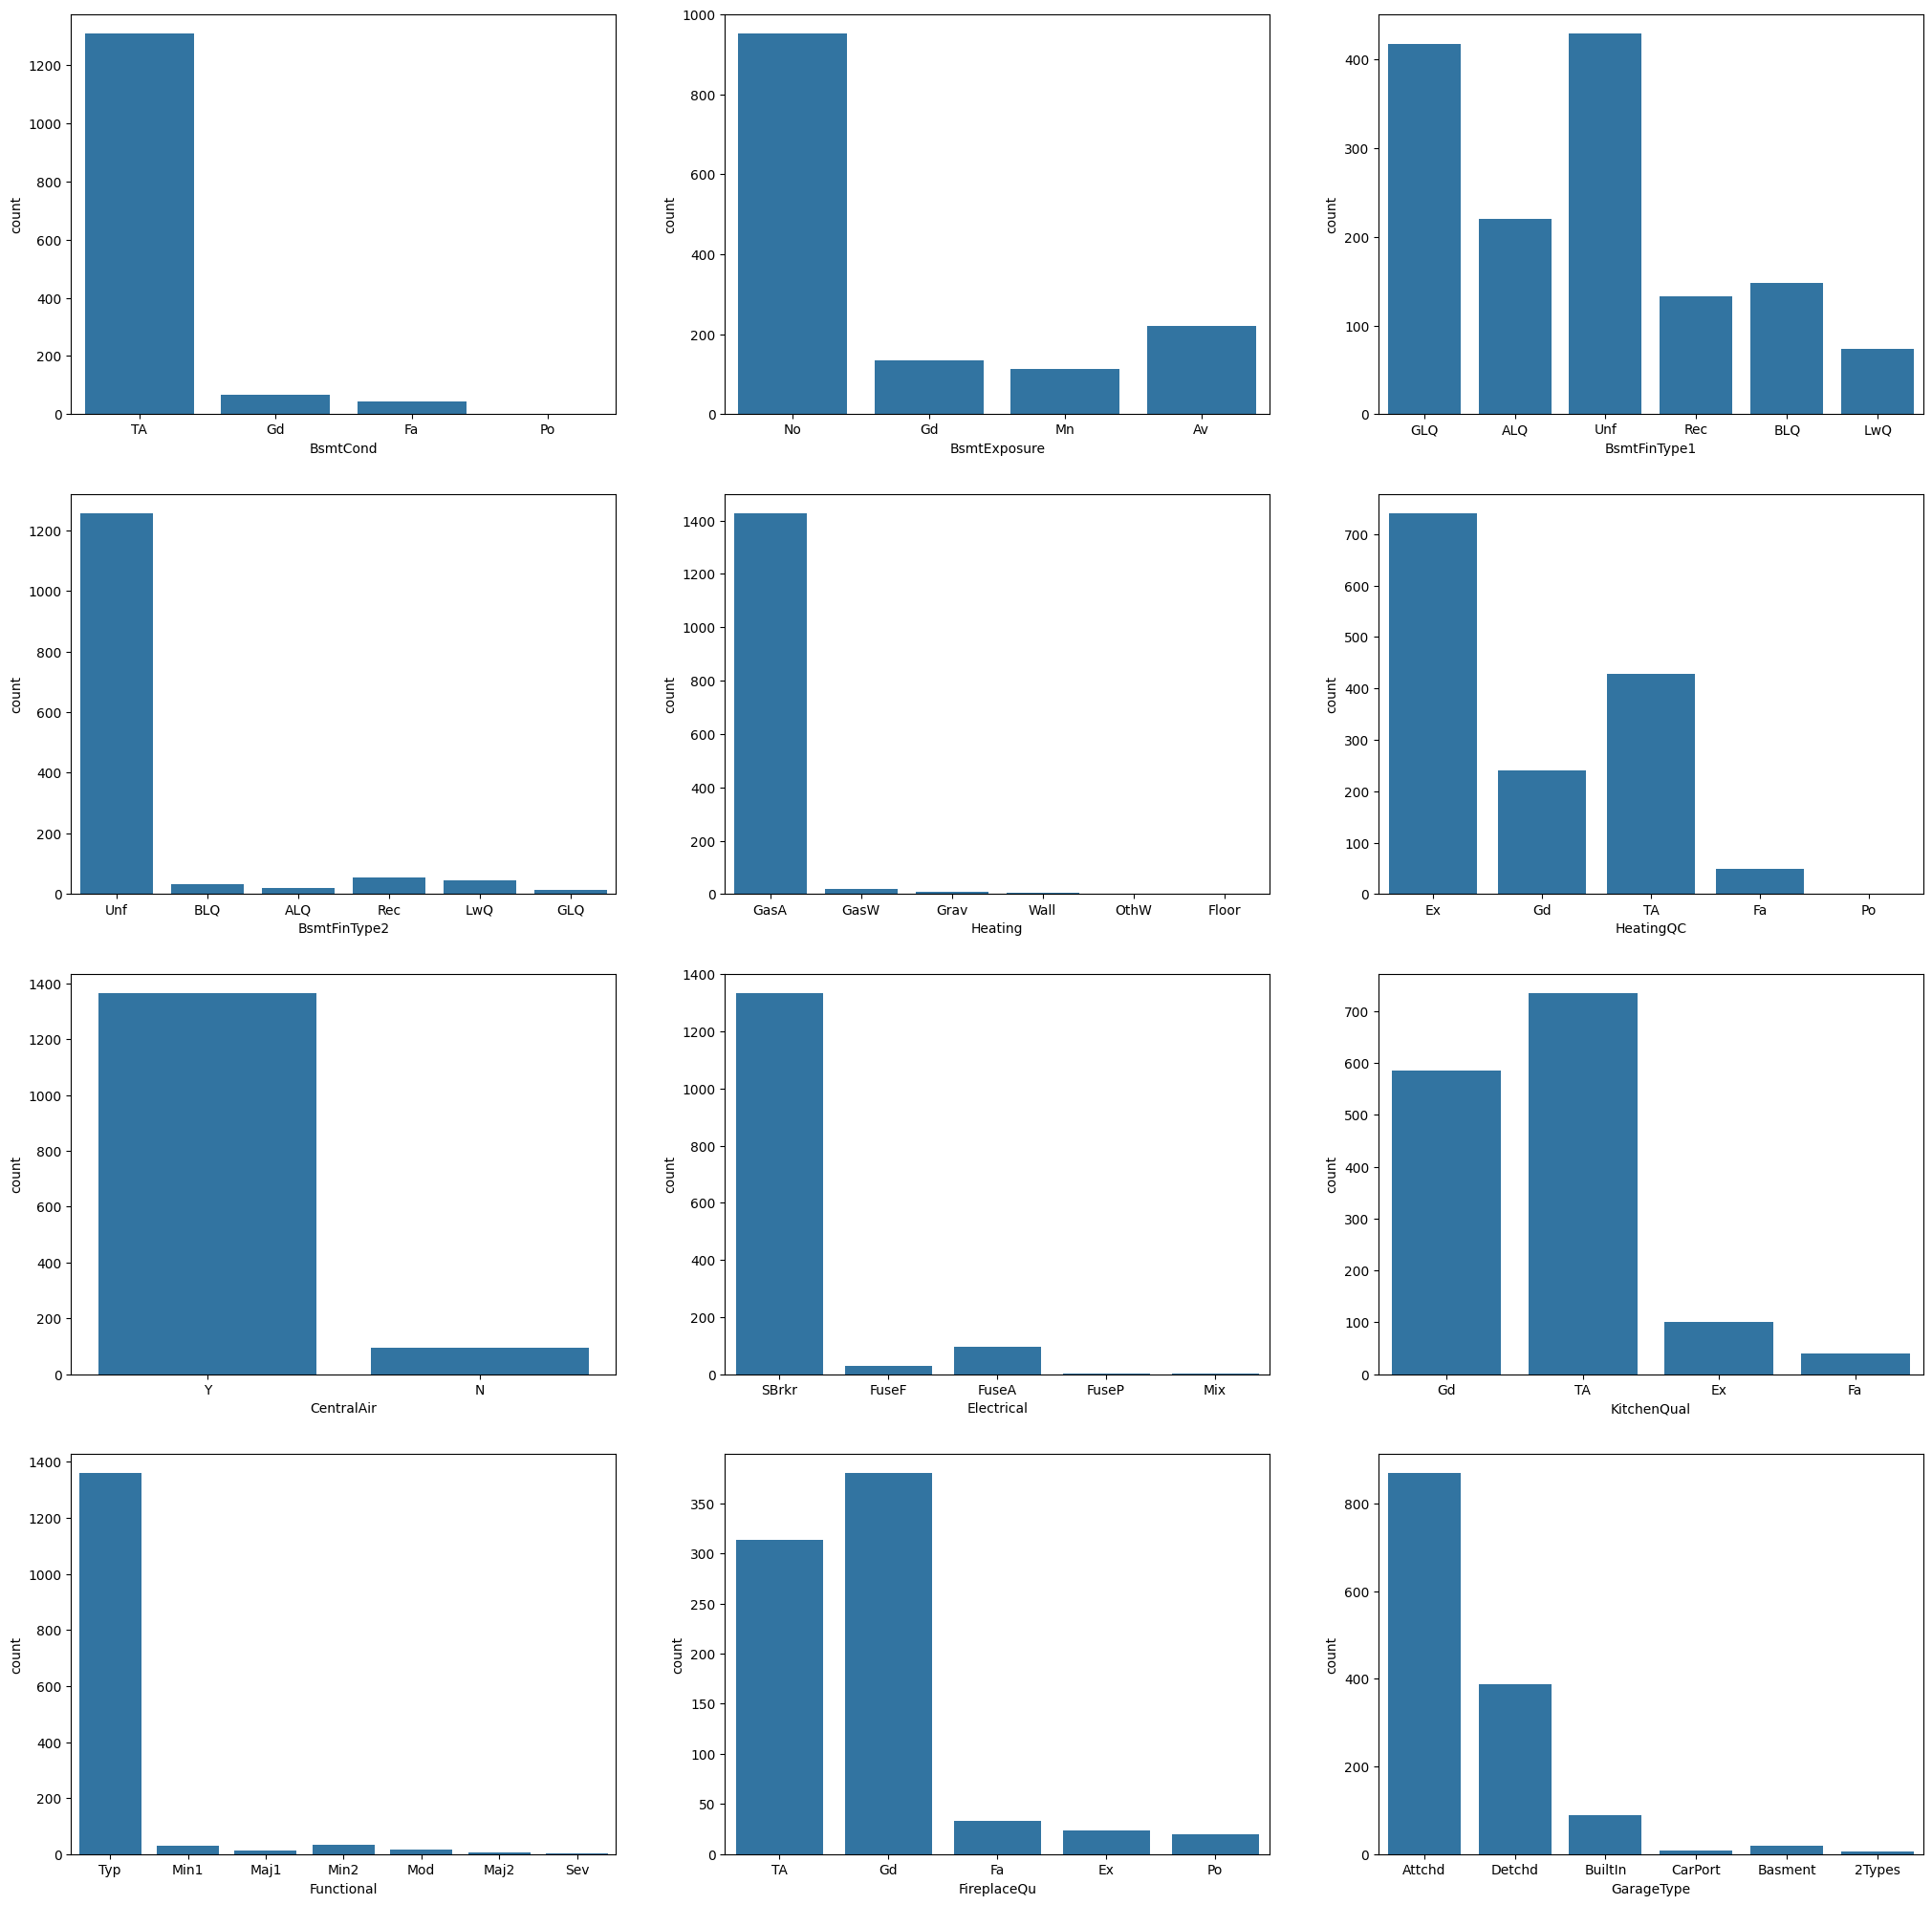

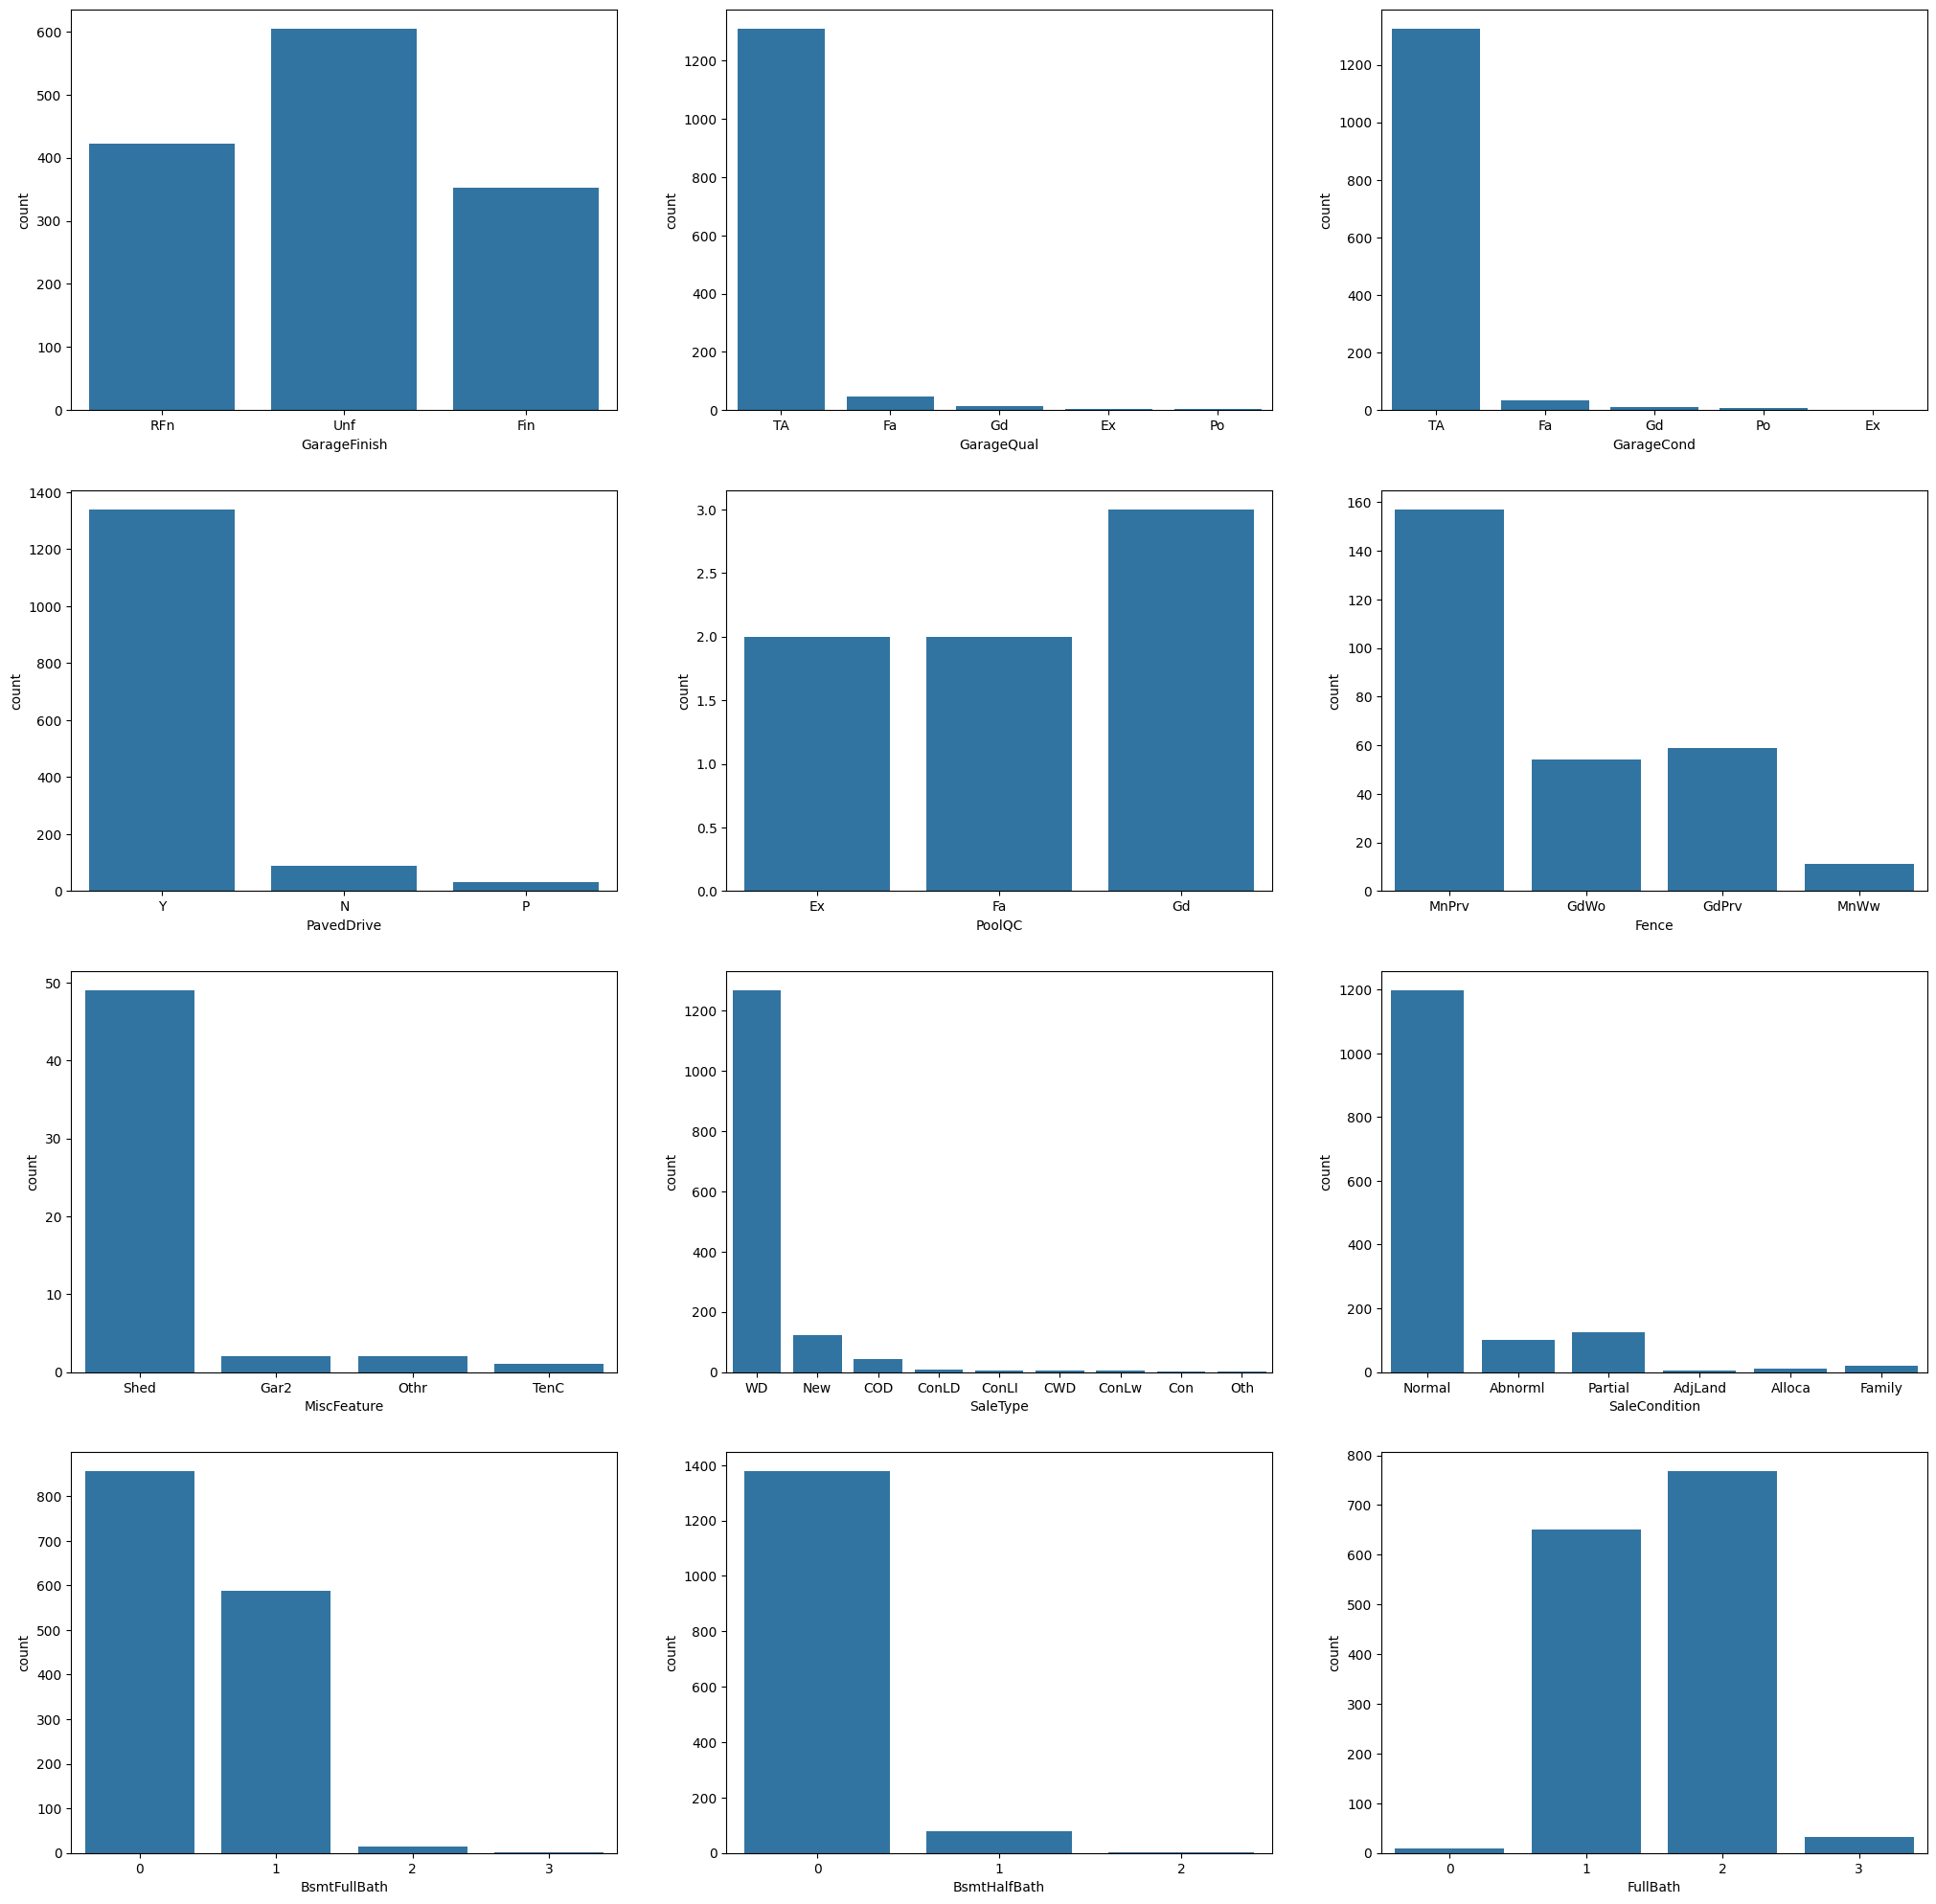

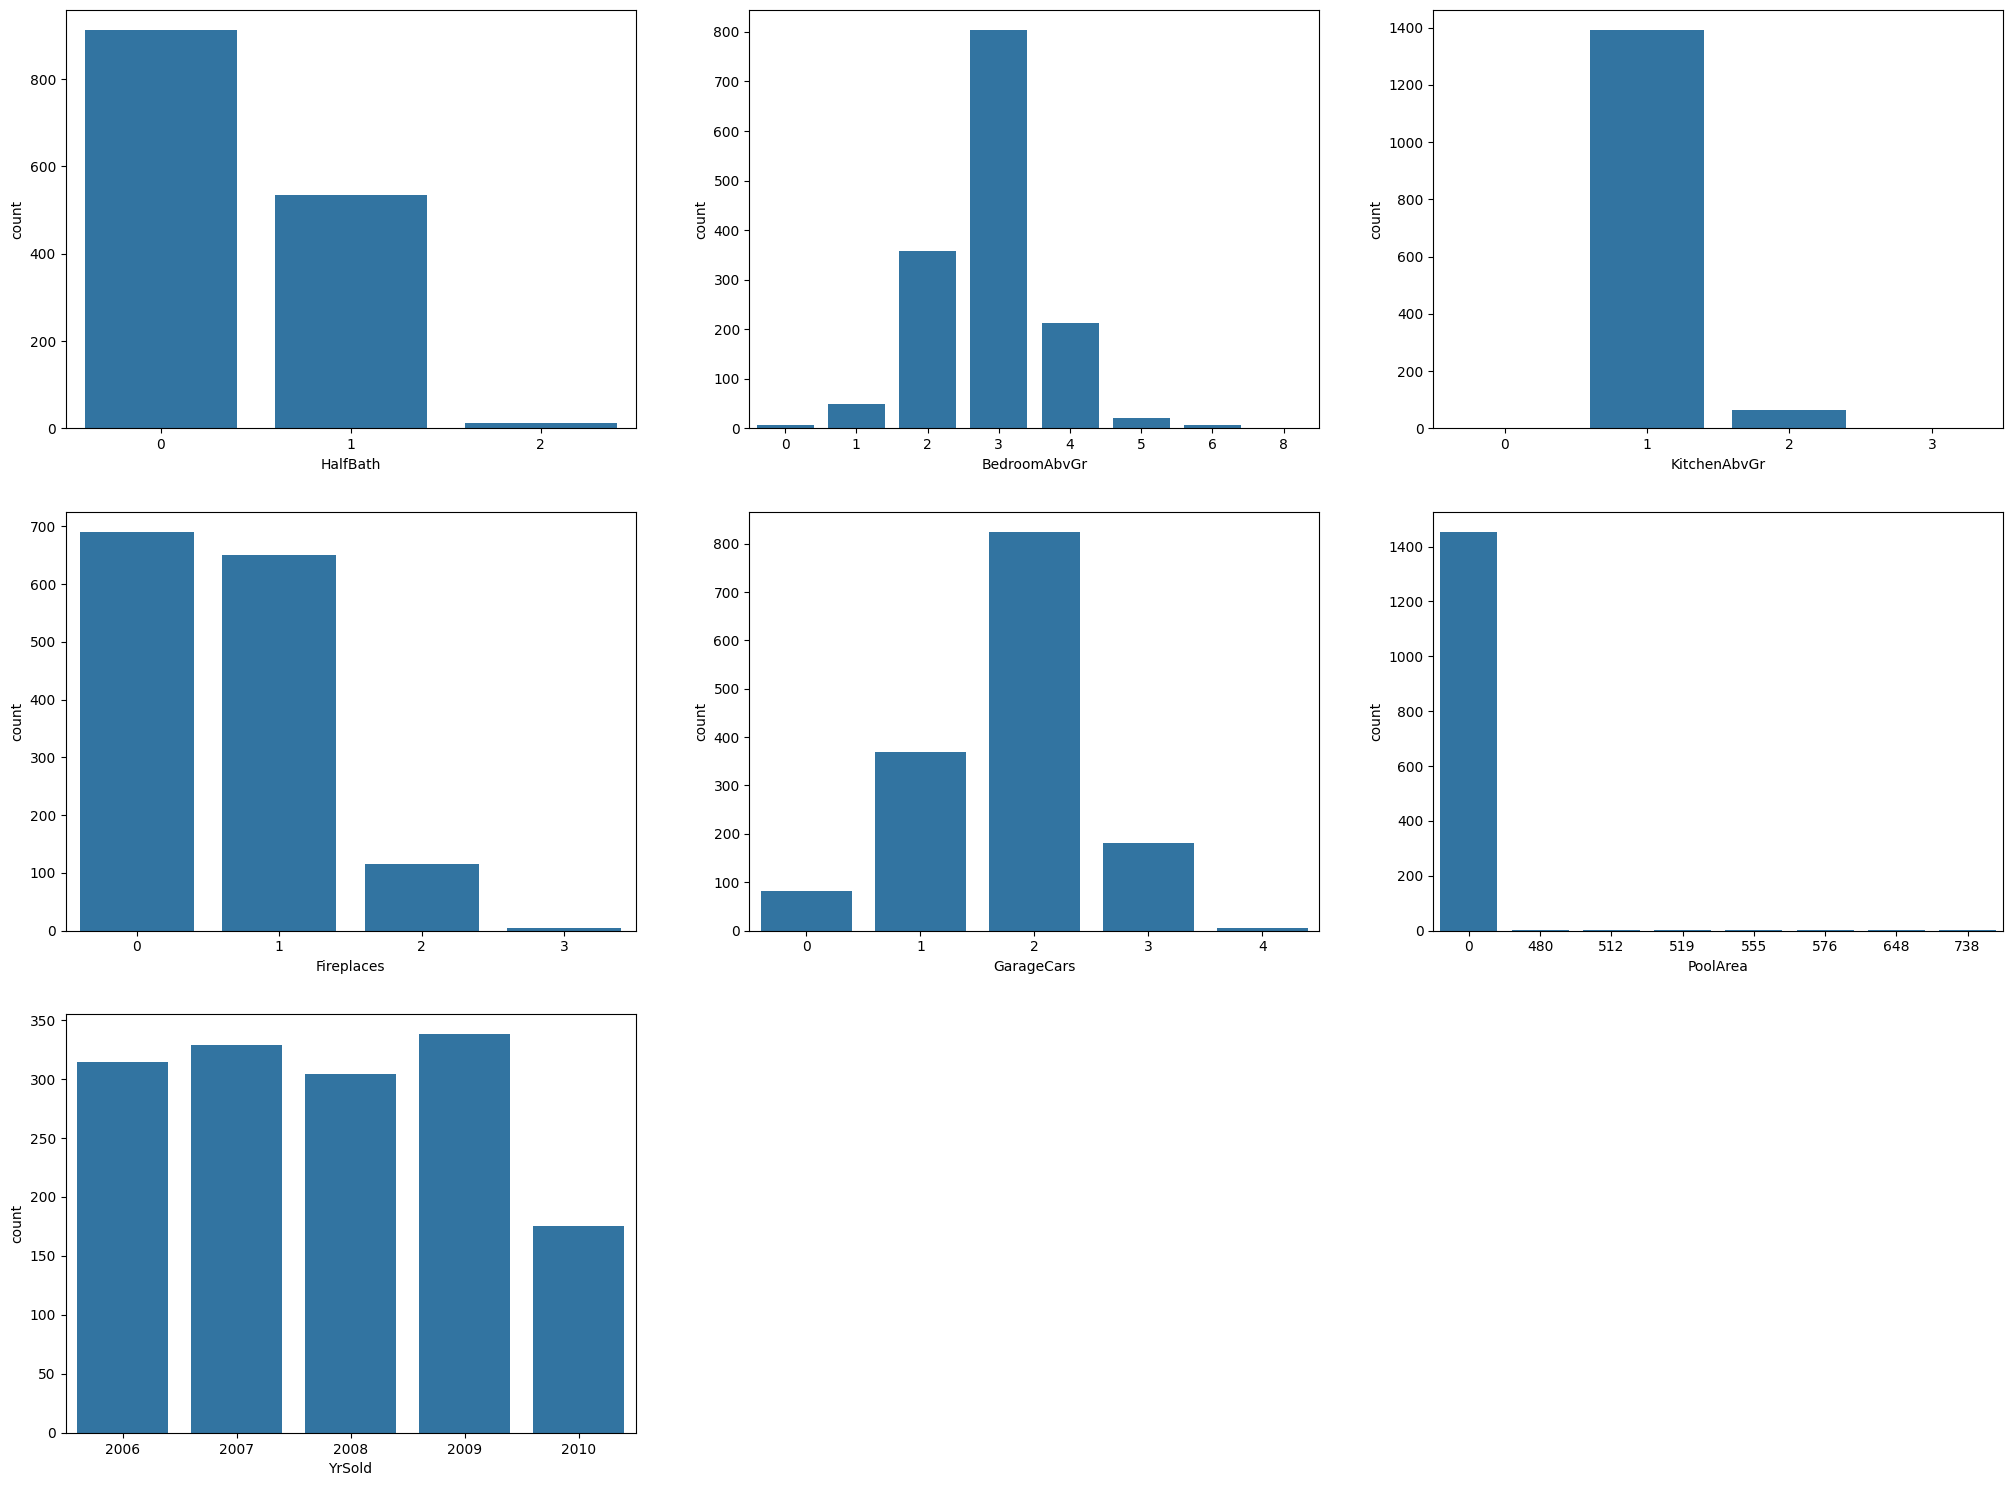

In [88]:



index = 1
plt.figure(figsize=(25, 25))
for feature in categorical_features:
    plt.subplot(4, 3, index)
    seaborn.countplot(x = train_df[feature], data = train_df)
    
    index += 1
    
    if index > 12:
        plt.show()
        plt.figure(figsize=(25, 25))
        index = 1

plt.show()

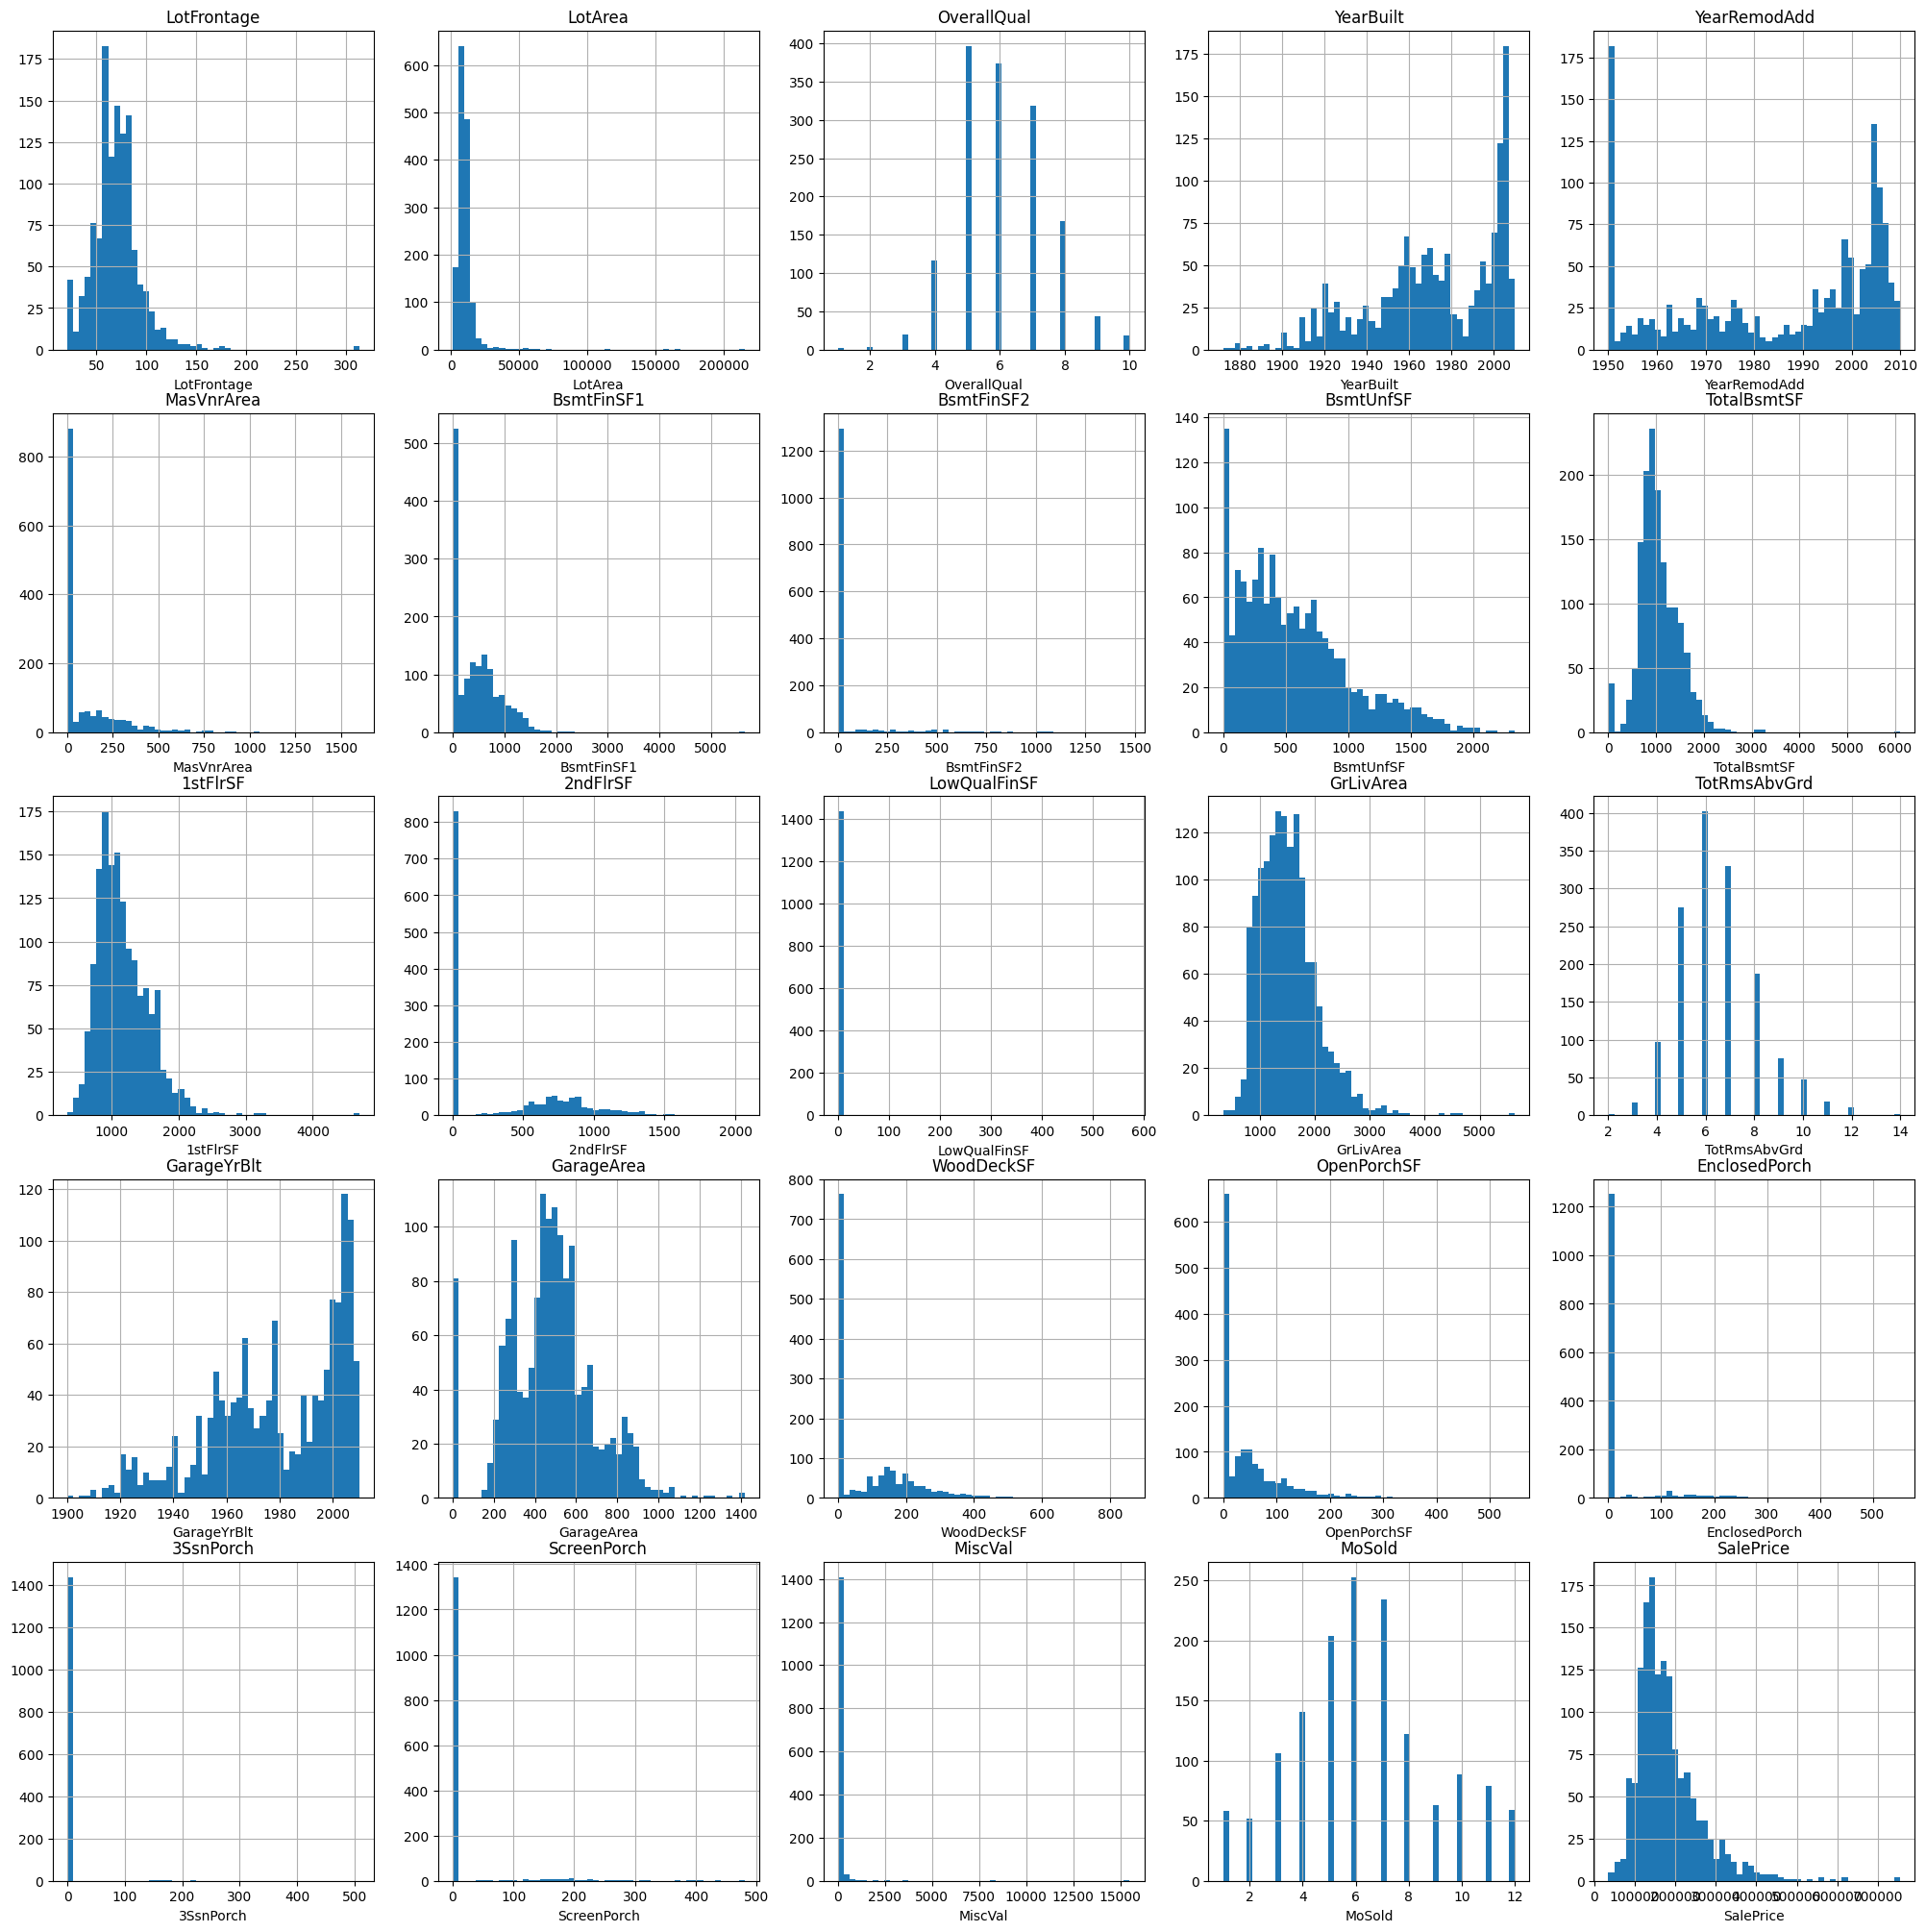

<Figure size 2500x2500 with 0 Axes>

In [89]:
index = 1
numRows = 5
numCols = 5
plt.figure(figsize=(25, 25))

for feature in numerical_features:
    plt.subplot(5, 5, index)
    
    train_df[feature].hist(bins = 50)
    plt.xlabel(feature)
    plt.title(feature)
    
    index += 1
    
    if index > numRows * numCols:
        plt.show()
        plt.figure(figsize=(25, 25))
        index = 1

plt.show()

In [122]:
from sklearn.impute import SimpleImputer

num_df = train_df[[feature for feature in numerical_features if feature != "SalePrice"]]

imp_mean = SimpleImputer(missing_values = np.nan, strategy="mean")
imp_df = imp_mean.fit_transform(num_df)

num_df = pd.DataFrame(imp_df, columns = num_df.columns)

feature_corr = num_df.corr()

feature_corr

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold
LotFrontage,1.000000,0.306795,0.234196,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,...,0.320146,0.064324,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.001168,0.010158
LotArea,0.306795,1.000000,0.105806,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,...,0.190015,-0.024812,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.038068,0.001205
OverallQual,0.234196,0.105806,1.000000,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,...,0.427452,0.518018,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,-0.031406,0.070815
YearBuilt,0.117598,0.014228,0.572323,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,...,0.095589,0.780555,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,-0.034383,0.012398
YearRemodAdd,0.082746,0.013788,0.550684,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,...,0.191740,0.618130,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,-0.010286,0.021490
MasVnrArea,0.179283,0.103960,0.410238,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,...,0.280027,0.249367,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,-0.029815,-0.005940
BsmtFinSF1,0.215828,0.214103,0.239666,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,...,0.044316,0.150338,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.003571,-0.015727
BsmtFinSF2,0.043340,0.111170,-0.059119,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,-0.209294,0.104810,...,-0.035227,-0.087126,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.004940,-0.015211
BsmtUnfSF,0.122156,-0.002618,0.308159,0.149040,0.181133,0.114184,-0.495251,-0.209294,1.000000,0.415360,...,0.250647,0.186098,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.023837,0.034888
TotalBsmtSF,0.363358,0.260833,0.537808,0.391452,0.291066,0.362452,0.522396,0.104810,0.415360,1.000000,...,0.285573,0.311700,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,-0.018479,0.013196


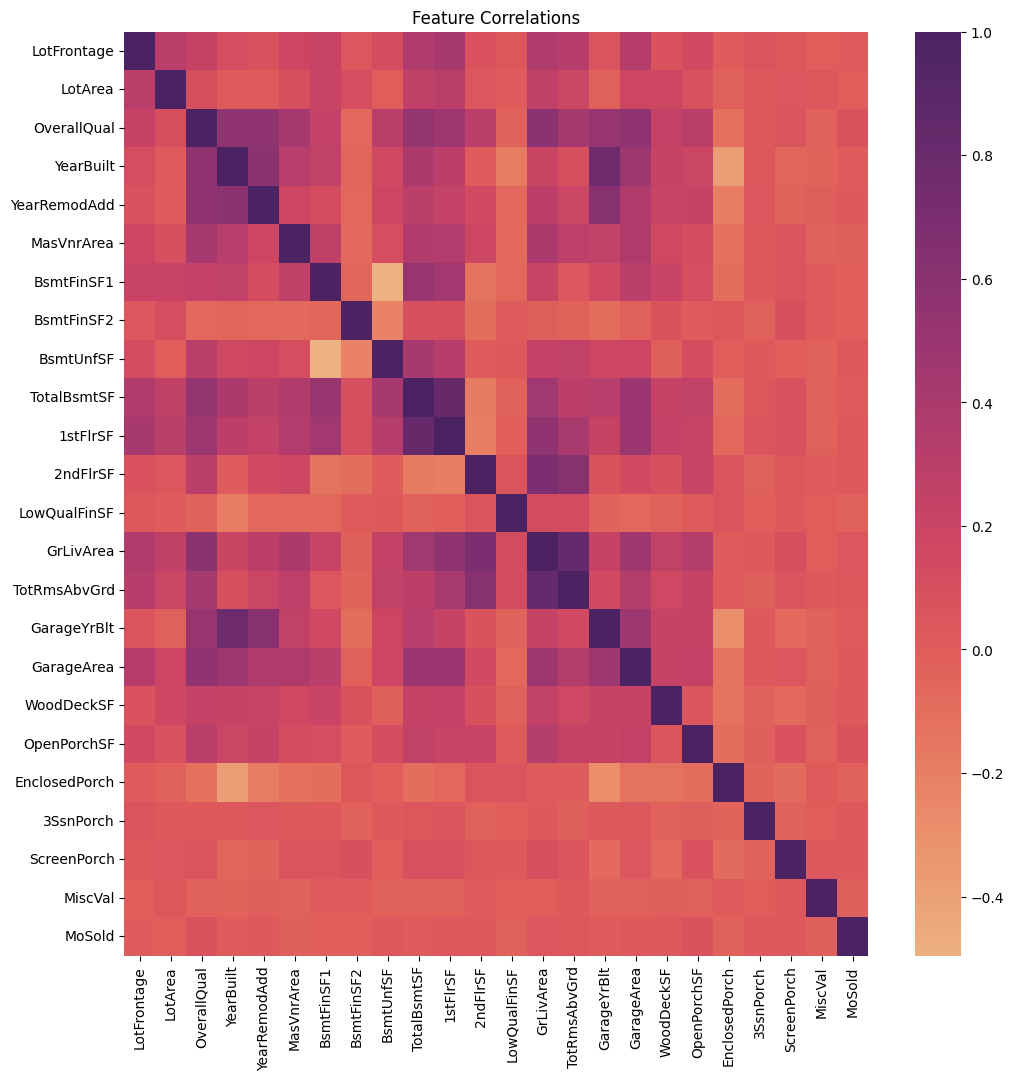

In [123]:
plt.figure(figsize = (12, 12))
seaborn.heatmap(feature_corr, cmap = "flare")
plt.title("Feature Correlations")
plt.show()

In [125]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

k_best_selector = SelectKBest(mutual_info_regression, k = 10)

X = num_df
y = train_df["SalePrice"]

k_best_selector.fit(X, y)

mask = k_best_selector.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool_val, feature in zip(mask, num_df.columns):
    if bool_val:
        new_features.append(feature)


num_df = num_df[new_features]


In [130]:
for feature in new_features:
    print(feature)

OverallQual
YearBuilt
YearRemodAdd
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
TotRmsAbvGrd
GarageYrBlt
GarageArea


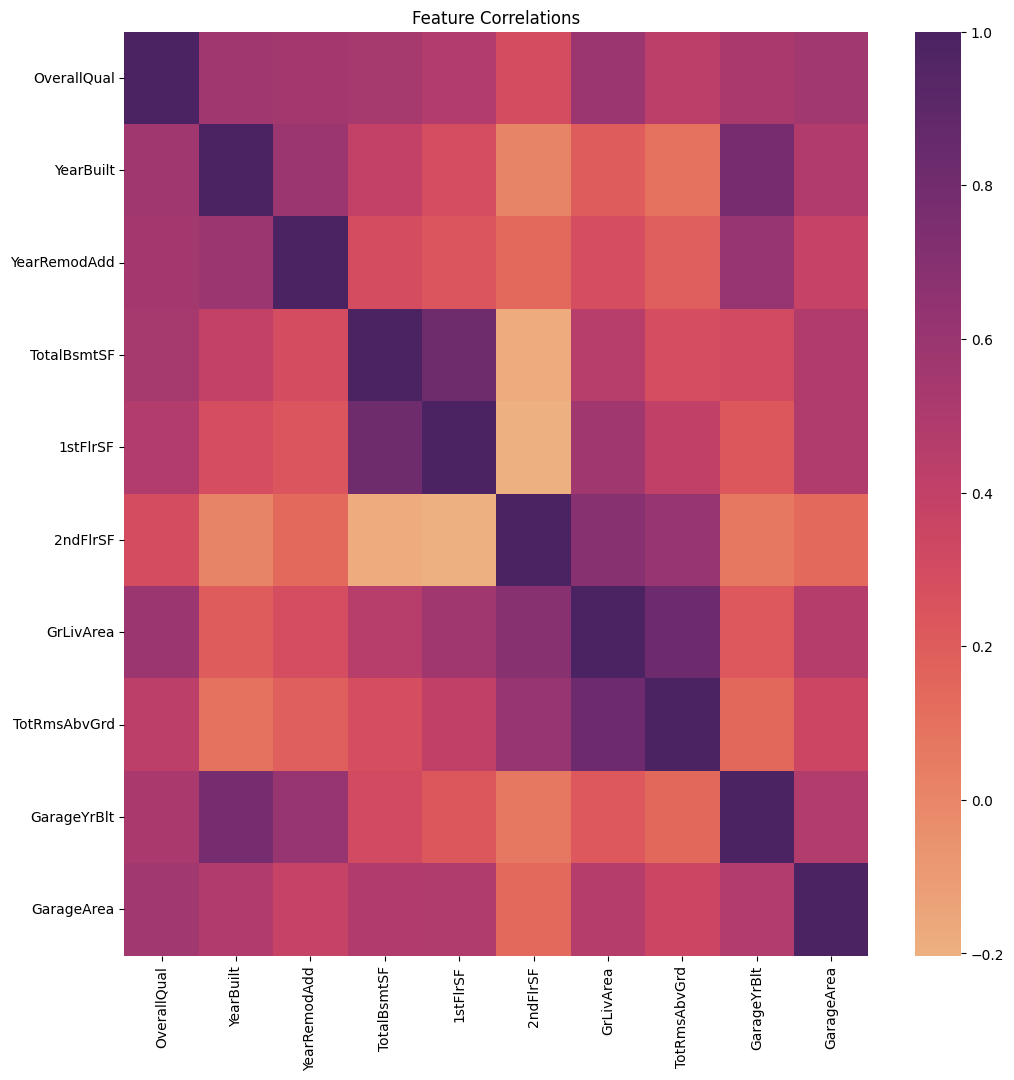

In [127]:
feature_corr = num_df.corr()
plt.figure(figsize = (12, 12))
seaborn.heatmap(feature_corr, cmap = "flare")
plt.title("Feature Correlations")
plt.show()